In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
import sklearn.metrics
import seaborn as sns
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from scipy import stats
%matplotlib inline 
from collections import Counter
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.ensemble import  AdaBoostClassifier

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"#让子模块内每句语言都输出结果

In [4]:
data_df = pd.read_csv('old.csv')


In [5]:
data_df.describe()
x = data_df.drop(['bad'],axis=1)
y = data_df.drop(['SCOREB'],axis=1)
x
y


,SCOREB,bad
count,473666.000000,473666.000000
mean,705.809167,0.010374
std,49.742296,0.101325
min,447.000000,0.000000
25%,672.000000,0.000000
50%,707.000000,0.000000
75%,741.000000,0.000000
max,799.000000,1.000000


,SCOREB
0,729
1,730
2,730
3,678
4,734
5,734
6,716
7,733
8,728
9,728


,bad
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


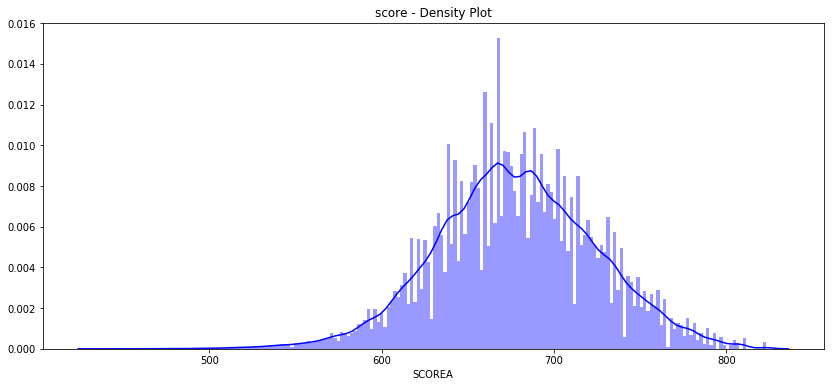

In [5]:
plt.figure(figsize = (14,6))
plt.title('score - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data_df['SCOREA'],kde=True,bins=200, color="blue")
plt.show()

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state=20)#切分训练集和测试集
y_train.apply(pd.value_counts)#统计每个取值的频数
y_test.apply(pd.value_counts)


,bad
0,281238
1,2961


,bad
0,187514
1,1953


Text(0.5, 0, 'min_samples_leaf')

Text(0, 0.5, 'AUC')

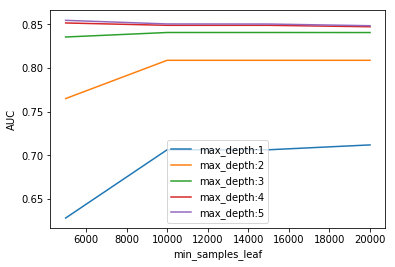

0:00:37.401139


In [7]:
#网格搜索，将每种组合都试一下并返回一组AUC值
import datetime
def gridsearch(max_depth,min_samples_leaf):
    tuned_parameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    grid_score = []
    for i in max_depth:
        for j in min_samples_leaf:
            clf_final_train = DecisionTreeClassifier(criterion = 'gini',max_depth =i,
                                                     min_samples_split = 20000,
                                                     min_samples_leaf = j,splitter = 'best',random_state=1)
            clf_final_train = clf_final_train.fit(x_train,y_train)
            result_train = clf_final_train.predict_proba(x_train)
            pro_train=[i[0] for i in result_train]
            sample_train=y_train.iloc[:,0]
            fpr_train, tpr_train, thresholds_train = metrics.roc_curve(sample_train, pro_train)
            result_test = clf_final_train.predict_proba(x_test)
            pro_test=[i[0] for i in result_test]
            sample_test=y_test.iloc[:,0]
            fpr_test, tpr_test, thresholds_test = metrics.roc_curve(sample_test, pro_test)
            score_train = [1 - i for i in pro_train]
            score_test = [1-i for i in pro_test]
            train_auc = metrics.roc_auc_score(sample_train,score_train)#用概率作为计算AUC的预测值
            test_auc = metrics.roc_auc_score(sample_test,score_test)
            grid_score.append(test_auc)
    return grid_score
start = datetime.datetime.now()#计算函数运算时间
max_depth = range(1,6,1)
min_samples_leaf = range(5000,25000,5000)
grid_score = gridsearch(max_depth,min_samples_leaf)
test_scores = np.array(grid_score).reshape(len(max_depth),len(min_samples_leaf))
for i, value in enumerate(max_depth):
    plt.plot(min_samples_leaf, test_scores[i], label= 'max_depth:'   + str(value))
plt.legend()
plt.xlabel( 'min_samples_leaf' )                                                                                                      
plt.ylabel( 'AUC' )
plt.show()        
end = datetime.datetime.now()
print(end - start)

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
clf_final_train_gini = DecisionTreeClassifier(criterion = 'gini',max_depth =3,min_samples_split = 20000,
                                              min_samples_leaf = 10000,splitter = 'best',random_state=1)
clf_final_train_gini = clf_final_train_gini.fit(x_train,y_train)
clf_final_train_entro = DecisionTreeClassifier(criterion = 'entropy',max_depth =3,min_samples_split = 20000,
                                               min_samples_leaf = 10000,splitter = 'best',random_state=1)
clf_final_train_entro = clf_final_train_entro.fit(x_train,y_train)
clf_final_train = DecisionTreeClassifier(criterion = 'entropy',max_depth =3,min_samples_split = 20000,
                                         min_samples_leaf = 10000,splitter = 'best',random_state=1)
clf_final_train = clf_final_train.fit(x_train,y_train)


In [38]:
clf_final_train.predict_proba(x_train)
clf_final_train.predict_proba(x_test)
clf_final_train.apply(x_train)#得到每个样本所属叶子节点的编号

array([[9.93418244e-01, 6.58175608e-03],
       [9.93418244e-01, 6.58175608e-03],
       [9.99563160e-01, 4.36840189e-04],
       ...,
       [9.93418244e-01, 6.58175608e-03],
       [9.98025421e-01, 1.97457878e-03],
       [9.99563160e-01, 4.36840189e-04]])

array([[9.99563160e-01, 4.36840189e-04],
       [9.93418244e-01, 6.58175608e-03],
       [9.06448683e-01, 9.35513170e-02],
       ...,
       [9.93418244e-01, 6.58175608e-03],
       [9.99563160e-01, 4.36840189e-04],
       [9.98025421e-01, 1.97457878e-03]])

array([ 9,  9, 12, ...,  9, 11, 12], dtype=int64)

In [9]:
#计算由训练集得到的叶子节点的频数和违约率
import datetime
def get_train_values_of_pools(data):
    dict_proba = {}
    result = clf_final_train.apply(data)
    proba = clf_final_train.predict_proba(data)
    dict_number = Counter(clf_final_train.apply(data))
    for i in range(0,len(result)):
        dict_proba[result[i]] = proba[i][1]
        if len(dict_proba.keys()) == len(dict_number.keys()):
            break
    return dict_proba, dict_number
start = datetime.datetime.now()
dict_proba, dict_number = get_train_values_of_pools(x_train) 
print(dict_proba)
print(dict_number)
clf_final_train.tree_.__getstate__()['values']
end = datetime.datetime.now()
print(end-start)
    
    

{9: 0.006581756083677245, 12: 0.0004368401892974154, 4: 0.044575936883629194, 2: 0.09355131698455948, 5: 0.023025246505580237, 11: 0.0019745787762341115, 8: 0.013864768683274022}
Counter({11: 84575, 12: 68675, 9: 56216, 8: 35125, 5: 18458, 2: 11010, 4: 10140})


array([[[2.81238e+05, 2.96100e+03]],

       [[3.77010e+04, 1.90700e+03]],

       [[9.98000e+03, 1.03000e+03]],

       [[2.77210e+04, 8.77000e+02]],

       [[9.68800e+03, 4.52000e+02]],

       [[1.80330e+04, 4.25000e+02]],

       [[2.43537e+05, 1.05400e+03]],

       [[9.04840e+04, 8.57000e+02]],

       [[3.46380e+04, 4.87000e+02]],

       [[5.58460e+04, 3.70000e+02]],

       [[1.53053e+05, 1.97000e+02]],

       [[8.44080e+04, 1.67000e+02]],

       [[6.86450e+04, 3.00000e+01]]])

0:00:00.297017


In [177]:
#第一次的方法
def get_values_of_pools(data):
    dict_proba = {}
    dict_number = {}
    for i in range(0,len(clf_final_train.apply(data))):
        if clf_final_train.apply(data)[i] not in dict_proba.keys():
            dict_proba[clf_final_train.apply(data)[i]] = clf_final_train.predict_proba(data)[i][0]
            dict_number[clf_final_train.apply(data)[i]] = 1
        else:
            dict_number[clf_final_train.apply(data)[i]] += 1
    return dict_proba, dict_number
import datetime
start = datetime.datetime.now()
dict_proba, dict_number = get_values_of_pools(x_train) 
print(dict_proba)
print(dict_number)
clf_final_train.tree_.__getstate__()['nodes']
end = datetime.datetime.now()
print(end-start)

{7: 0.985361683940592, 5: 0.9943541220136964, 6: 0.9977595600590662, 8: 0.9903986981285599, 3: 0.9720419370943585}
{7: 9359, 5: 57387, 6: 39278, 8: 18435, 3: 2003}


array([( 1,  2,  0, 645.5, 0.01229088, 126462, 126462.),
       ( 3,  4,  0, 575.5, 0.02452633,  29797,  29797.),
       ( 5,  6,  0, 700.5, 0.00848795,  96665,  96665.),
       (-1, -1, -2,  -2. , 0.05435282,   2003,   2003.),
       ( 7,  8,  0, 617.5, 0.02233954,  27794,  27794.),
       (-1, -1, -2,  -2. , 0.011228  ,  57387,  57387.),
       (-1, -1, -2,  -2. , 0.00447084,  39278,  39278.),
       (-1, -1, -2,  -2. , 0.02884807,   9359,   9359.),
       (-1, -1, -2,  -2. , 0.01901823,  18435,  18435.)],
      dtype=[('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')])

0:35:28.237417


In [10]:
#计算由训练集得到的每个叶子节点的方差
def get_variance_dict(x_train,y_train,dict_proba,dict_number):
    dict_var = {}
    result = clf_final_train.apply(x_train)
    for keys in dict_proba.keys():
        dict_var[keys] = 0#将字典里的值初始化为0
    for i in range(0,len(x_train)):
        dict_var[result[i]] += np.square(y_train.iloc[i,0] - (dict_proba[result[i]])) #计算字典里的和
    for keys in dict_var.keys():
        dict_var[keys] = dict_var[keys]/dict_number[keys]#对每个和除以频数作为方差
    return dict_var
start = datetime.datetime.now()
var = get_variance_dict(x_train,y_train,dict_proba,dict_number)
end = datetime.datetime.now()
var
print(end-start)
        
        

{9: 0.006538436570535983,
 12: 0.00043664935994605126,
 4: 0.042588922734574146,
 2: 0.08479946807502442,
 5: 0.02249508452894568,
 11: 0.001970679814890752,
 8: 0.013672536872623597}

0:00:12.939740


In [11]:
#计算由测试集得到的叶子节点频数和违约率
def get_test_avg_dict(x_test,y_test):
    dict_test_avg = {}
    result = clf_final_train.apply(x_test)
    dict_test_number = Counter(result)
    for i in range(0,len(result)):
        if result[i] not in dict_test_avg:
            dict_test_avg[result[i]] = y_test.iloc[i,0]
        else:
            dict_test_avg[result[i]] += y_test.iloc[i,0]
    for keys in dict_test_number.keys():
        dict_test_avg[keys] = (dict_test_avg[keys]/dict_test_number[keys])
    return dict_test_avg,dict_test_number

start = datetime.datetime.now()
dict_test_avg,dict_test_number = get_test_avg_dict(x_test,y_test)
print(dict_test_avg)
print(dict_test_number)
end = datetime.datetime.now()        
print(end-start)    
    

{12: 0.0003726844239833388, 9: 0.006596306068601583, 2: 0.09127679654846974, 8: 0.013585784525144484, 11: 0.0021231043710972348, 5: 0.02132569427866635, 4: 0.04560308972073678}
Counter({11: 56050, 12: 45615, 9: 37900, 8: 23186, 5: 12567, 2: 7417, 4: 6732})
0:00:04.939283


In [12]:
#计算由测试集得到的每个叶子节点的方差
def get_test_variance_dict(x_test,y_test,dict_test_avg,dict_test_number):
    dict_var = {}
    result = clf_final_train.apply(x_test)
    for keys in dict_proba.keys():
        dict_var[keys] = 0
    for i in range(0,len(x_test)):
        dict_var[result[i]] += np.square(y_train.iloc[i,0] - (dict_test_avg[result[i]])) 
    for keys in dict_var.keys():
        dict_var[keys] = dict_var[keys]/dict_test_number[keys]
    return dict_var
start = datetime.datetime.now()
var_test = get_test_variance_dict(x_test,y_test,dict_test_avg,dict_test_number)
end = datetime.datetime.now()
var_test
print(end-start)

{9: 0.010510439219999543,
 12: 0.010405618446386534,
 4: 0.01125937735327608,
 2: 0.017368881842979425,
 5: 0.010586667572894217,
 11: 0.010681546440062983,
 8: 0.009331325803175331}

0:00:09.438540


In [13]:
#计算每个叶子节点的置信区间
def get_confident_interval(alpha,dict_test_avg,var_test,dict_test_number):
    dict_confi_interval = {}
    for keys in dict_test_avg.keys():
        dict_confi_interval[keys] = stats.norm.interval(alpha,loc = dict_test_avg[keys],scale = np.sqrt((var_test[keys])/dict_test_number[keys]))
    return dict_confi_interval
start = datetime.datetime.now()
interval = get_confident_interval(0.95,dict_test_avg,var_test,dict_test_number)
print(interval)
end = datetime.datetime.now()
print(end - start)
    
    

{12: (-0.0005634284112486483, 0.0013087972592153259), 9: (0.005564165333338784, 0.007628446803864383), 2: (0.08827749672542494, 0.09427609637151453), 8: (0.012342396009396262, 0.014829173040892705), 11: (0.0012674914212724732, 0.002978717320921996), 5: (0.01952677398301711, 0.02312461457431559), 4: (0.043068350851295865, 0.0481378285901777)}
0:00:00.168009


In [14]:
def leaf_test(interval,dict_proba):
    number = 0
    for keys in dict_proba.keys():
        if dict_proba[keys]>=interval[keys][0] and dict_proba[keys]<=interval[keys][1]:
            number += 1
    return number
result = leaf_test(interval,dict_proba)
print(result)
        
    

7


In [16]:
#时间外样本检验
data_Test = pd.read_csv('old_test.csv')
#data_Test.head()
xTest = data_Test.drop(['bad'],axis=1)
yTest = data_Test.drop(['SCOREB'],axis=1)
start = datetime.datetime.now()
dict_Test_avg,dict_Test_number = get_test_avg_dict(xTest,yTest)
var_Test = get_test_variance_dict(xTest,yTest,dict_Test_avg,dict_Test_number)
interval_Test = get_confident_interval(0.95,dict_Test_avg,var_Test,dict_Test_number)
result_Test = leaf_test(interval_Test,dict_proba)
#print(dict_Test_avg)
#print(dict_Test_number)
#print(var_Test)
print(interval_Test)
#print(result_Test)
print(dict_proba)
end = datetime.datetime.now()        
print(end-start)

{11: (0.0030320713147174855, 0.00453119834493538), 5: (0.02723541990880698, 0.03033850887815741), 12: (-0.0001818347512894822, 0.0015669772751649652), 9: (0.008977700990647063, 0.010747283314421895), 2: (0.08707089518282421, 0.09245382606956909), 8: (0.01793443883277169, 0.02017123833283649), 4: (0.045559024321489734, 0.049797432576035965)}
{9: 0.006581756083677245, 12: 0.0004368401892974154, 4: 0.044575936883629194, 2: 0.09355131698455948, 5: 0.023025246505580237, 11: 0.0019745787762341115, 8: 0.013864768683274022}
0:00:17.017974


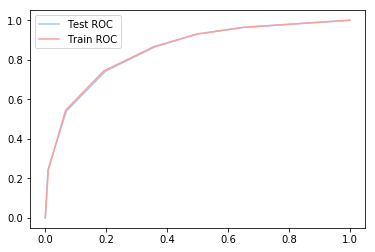

训练集AUC： 0.8513529810789133
测试集AUC： 0.8490317863741852


In [47]:
#画出模型训练集和测试集的ROC曲线
result_train = clf_final_train.predict_proba(x_train)
pro_train=[i[0] for i in result_train]
sample_train=y_train.iloc[:,0]
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(sample_train, pro_train)
result_test = clf_final_train.predict_proba(x_test)
pro_test=[i[0] for i in result_test]
sample_test=y_test.iloc[:,0]
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(sample_test, pro_test)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(tpr_test, fpr_test, 'b', label="Test ROC")
line2, = plt.plot(tpr_train, fpr_train, 'r', label="Train ROC")
plt.legend()
plt.show()
score_train = [1 - i for i in pro_train]
score_test = [1-i for i in pro_test]
train_auc = metrics.roc_auc_score(sample_train,score_train)
test_auc = metrics.roc_auc_score(sample_test,score_test)
print('训练集AUC：',train_auc)
print('测试集AUC：',test_auc)

True

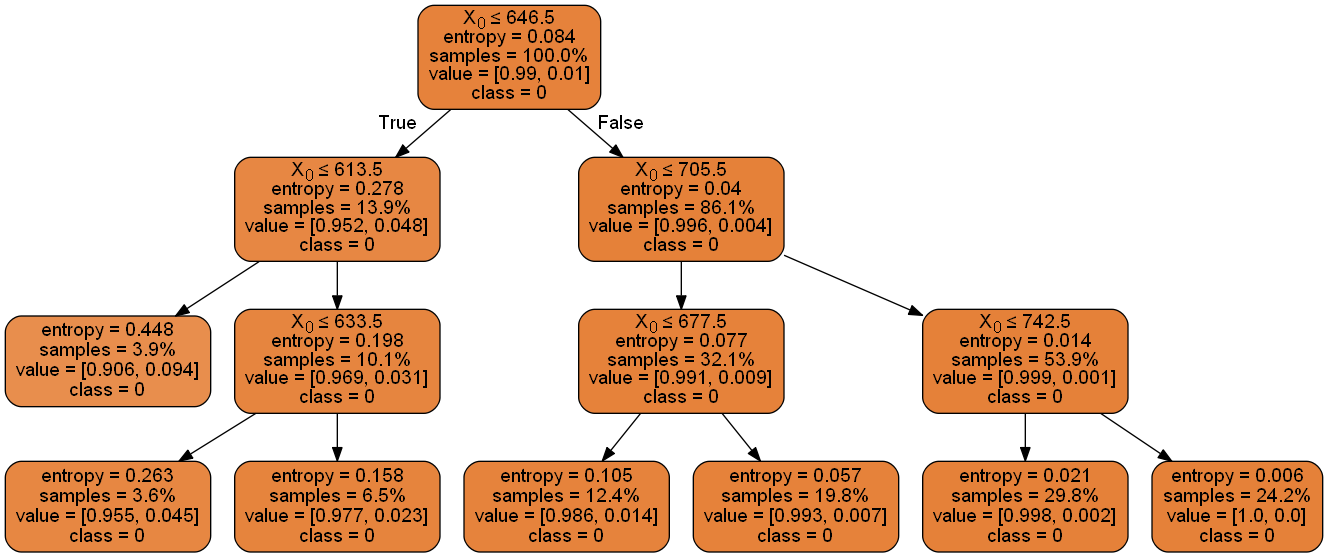

In [17]:
#
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import sys
import os       
os.environ["PATH"] += os.pathsep + 'D:\anaconda\Library\bin\graphviz'
dot_data = StringIO()
export_graphviz(clf_final_train_entro,out_file=dot_data,proportion =True,filled=True,rounded=True,special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('entro.png')
Image(graph.create_png())


(array([238672.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   3085.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

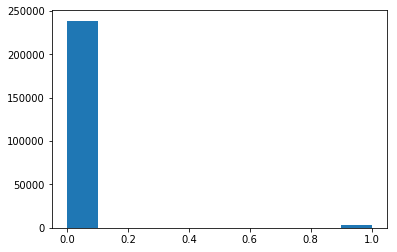

In [50]:
plt.hist(data_test.bad)

In [68]:
clf = AdaBoostClassifier(random_state=1,algorithm='SAMME',,learning_rate=0.8,n_estimators=50)
clf=clf.fit(x_train,y_train)
clf.predict_proba(x_test)[:,0]
roc_auc_score(y_test,clf.predict_proba(x_test)[:,0])

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.54197571, 0.53163853, 0.51959286, ..., 0.53163853, 0.54575244,
       0.54162035])

0.14351572894470505

0.9897185261813403

array([[0.54197571, 0.45802429],
       [0.53163853, 0.46836147],
       [0.51959286, 0.48040714],
       ...,
       [0.53163853, 0.46836147],
       [0.54575244, 0.45424756],
       [0.54162035, 0.45837965]])

array([[0.53114019, 0.46885981],
       [0.53114019, 0.46885981],
       [0.54575244, 0.45424756],
       ...,
       [0.53308922, 0.46691078],
       [0.54162035, 0.45837965],
       [0.54575244, 0.45424756]])